In [1]:
pwd

'/Users/j_b/projects/julian_research/Notebooks'

# Regime Research 

In [1]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import pandas as pd
import math
import decimal
import seaborn as sns
from scipy import stats
import numpy as np
import logging
import string
from datetime import datetime
from lmda.DataDownloader.CryptoCompareDataDownloader import CryptoCompareDataDownloader
from pandas.plotting import register_matplotlib_converters

pd.options.display.max_columns = 50  # None -> No Restrictions
pd.options.display.max_rows = 100    # None -> Be careful with this 
pd.options.display.max_colwidth = 400

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
sns.set_style('white')

In [15]:
# Bring in BTC/USD data to find and compare regimes
start_month = 12
start_year = 2020
end_month = 1
end_year = 2021
base = 'USD'
# tickers = ['BTC','ETH', 'XRP', 'LTC', 'BCH', 'XMR', 'ETC','LINK','ADA','EOS','XLM','NEO',
#            'DASH','DOT','ATOM']

tickers = ['BTC']


# use 'CCCAGG' for CryptoCompare Aggrigated data
exchange = 'CCCAGG'

# export csv
path = f'./{base}_daily_{exchange}_{start_month}-{end_month}_to_{start_year}-{end_year}.csv'

# from lmba module
CryptoCompareDataDownloader().download_hourly_data(path=path,
                                                   start_month=start_month,
                                                   start_year=start_year,
                                                   end_month=end_month,
                                                   end_year=end_year,
                                                   base=base,
                                                   tickers=tickers,
                                                   exchange=exchange)

TypeError: download_hourly_data() got an unexpected keyword argument 'base'

TypeError: download_hourly_data() got an unexpected keyword argument 'base'

In [3]:
# load in btc data
path = 'USD_daily_CCCAGG_Top15_from_4-12_to_2019-2020.csv'

df = pd.read_csv(path, header=0, index_col='Time', parse_dates=True)
dfresample = df.resample('D').last()
df = dfresample.replace(to_replace=0, method='bfill')
df.sort_index(inplace=True)
df.dropna(inplace=True)

# add cols
df['slow'] = df['BTC'].rolling(34).mean() #.plot(figsize=(20,10),color='r');
df['fast'] = df['BTC'].rolling(144).mean() #.plot(figsize=(20,10),color='navy');
df['ma_diff'] =  abs(df['slow'] - df['fast']) #.plot(figsize=(20,10),color='navy');
df.head()

,BTC,slow,fast,ma_diff
Time,,,,
2019-04-01,4151.32,NaN,NaN,NaN
2019-04-02,4906.93,NaN,NaN,NaN
2019-04-03,4976.59,NaN,NaN,NaN
2019-04-04,4913.36,NaN,NaN,NaN
2019-04-05,5047.23,NaN,NaN,NaN


,BTC,slow,fast,ma_diff
Time,,,,
2019-04-01,4151.32,NaN,NaN,NaN
2019-04-02,4906.93,NaN,NaN,NaN
2019-04-03,4976.59,NaN,NaN,NaN
2019-04-04,4913.36,NaN,NaN,NaN
2019-04-05,5047.23,NaN,NaN,NaN


In [4]:
# returns plot/% ret of BTC price between two datetime indexes
def plot_regime(title, start, end):
    start_date = start
    end_date = end
    
    df_plot = df[(df.index > start_date ) & (df.index <= end_date )]
    print(df['BTC'].loc[end_date]/df['BTC'].loc[start_date]-1)
    
    # Let's create a line plot of regime
    plt.figure(figsize = (30, 10))
    plt.plot(df_plot.index,df_plot['BTC'], color = 'cadetblue',marker='o')
    
    # Create a descriptive title
    plt.title(title)
    
    # Add axis labels
    plt.ylabel('BTC/USD')
    plt.xlabel('Time');
   

In [9]:
def subplot_regime(title, start, end):
    start_date = start
    end_date = end
    
    # retrieve values between two datetime indexes
    df_plot = df[(df.index > start_date ) & (df.index <= end_date )]
    
    # print helpful stats
    print('The return of BTC was ' + str(df['BTC'].loc[end_date]/df['BTC'].loc[start_date]-1))
    print('Occured over ' + str(len(df_plot['BTC'])) + ' day period')
    
    # Let's create a line plot of regime
    # Establish figure size.
    plt.figure(figsize = (15, 9))

    # plot 1
    ax1 = plt.subplot(2, 1, 1)
    ax1.set_title(f'{title}')
    ax1.plot(df_plot['BTC'],color = 'navy',marker='x')
    plt.ylabel('BTC/USD',fontsize=20)
    # Rotate text
    plt.xticks(rotation = 10)
    
    # Enlarge tick marks.
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12);
    #ax1.axhline(np.mean(df_plot['BTC']), color = 'orange') # vertical line

    # plt.subplot(3, 1, 2) means we have 3 rows, 1 column, and are referencing plot 2.
    ax2 = plt.subplot(2, 1, 2, sharex=ax1)
    ax2.set_title('MA Diff')
    ax2.plot(df_plot['ma_diff'],color = 'cadetblue',marker='o')
    plt.ylabel('MA diff',fontsize=20)
    # Rotate text
    plt.xticks(rotation = 10)
    
    # Enlarge tick marks.
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12);
    #ax2.axhline(np.mean(df['ma_diff']), color = 'orange') # vertical line


In [10]:
df.tail(20)

,BTC,slow,fast,ma_diff
Time,,,,
2020-12-11,18034.86,17811.135294,12983.633819,4827.501475
2020-12-12,18814.98,17908.980294,13049.065417,4859.914877
2020-12-13,19169.05,18021.745588,13115.952986,4905.792602
2020-12-14,19274.69,18138.244412,13183.032708,4955.211703
2020-12-15,19441.96,18248.093824,13251.725278,4996.368546
2020-12-16,21352.13,18396.493824,13332.584444,5063.909379
2020-12-17,22822.17,18587.356176,13422.030000,5165.326176
2020-12-18,23135.57,18794.992059,13506.006597,5288.985462
2020-12-19,23844.72,19026.757353,13595.669514,5431.087839


,BTC,slow,fast,ma_diff
Time,,,,
2020-12-11,18034.86,17811.135294,12983.633819,4827.501475
2020-12-12,18814.98,17908.980294,13049.065417,4859.914877
2020-12-13,19169.05,18021.745588,13115.952986,4905.792602
2020-12-14,19274.69,18138.244412,13183.032708,4955.211703
2020-12-15,19441.96,18248.093824,13251.725278,4996.368546
2020-12-16,21352.13,18396.493824,13332.584444,5063.909379
2020-12-17,22822.17,18587.356176,13422.030000,5165.326176
2020-12-18,23135.57,18794.992059,13506.006597,5288.985462
2020-12-19,23844.72,19026.757353,13595.669514,5431.087839


The return of BTC was -0.3009666566141329
Occured over 5 day period
The return of BTC was -0.3009666566141329
Occured over 5 day period


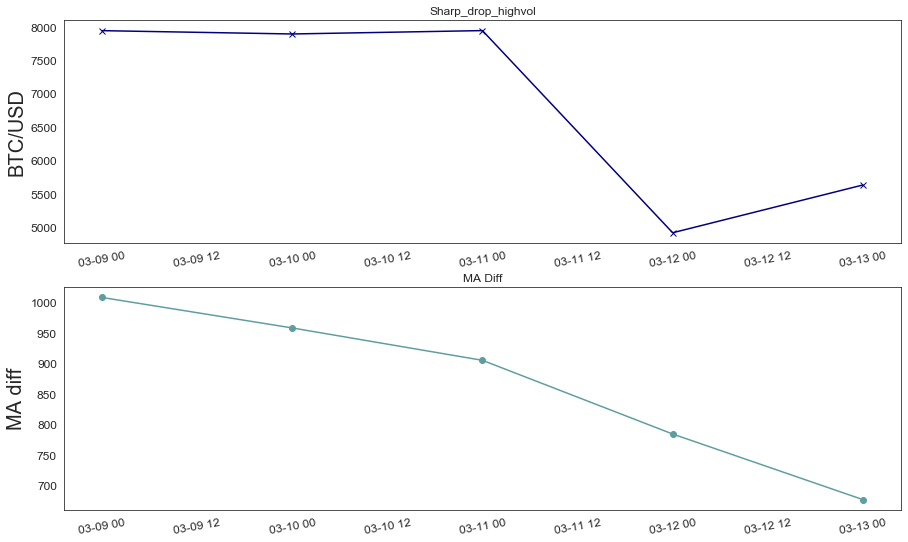

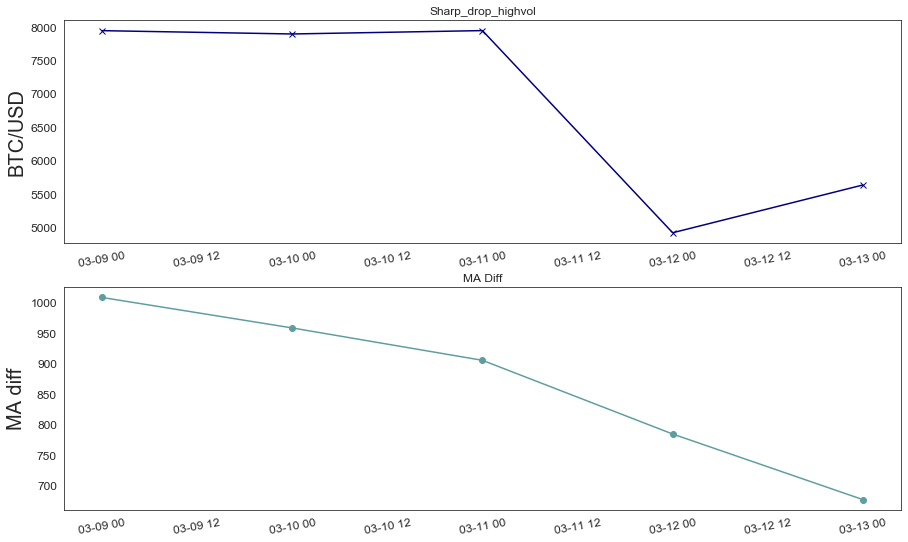

In [11]:
regname = 'Sharp_drop_highvol'
start = '2020-03-08'
end = '2020-03-13'
subplot_regime(regname, start, end);

The return of BTC was 0.28295854490744476
Occured over 3 day period
The return of BTC was 0.28295854490744476
Occured over 3 day period


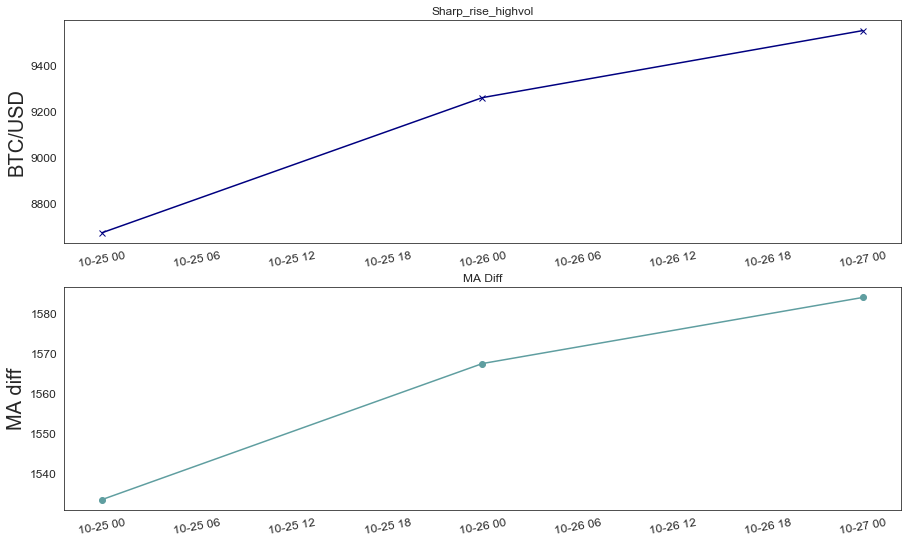

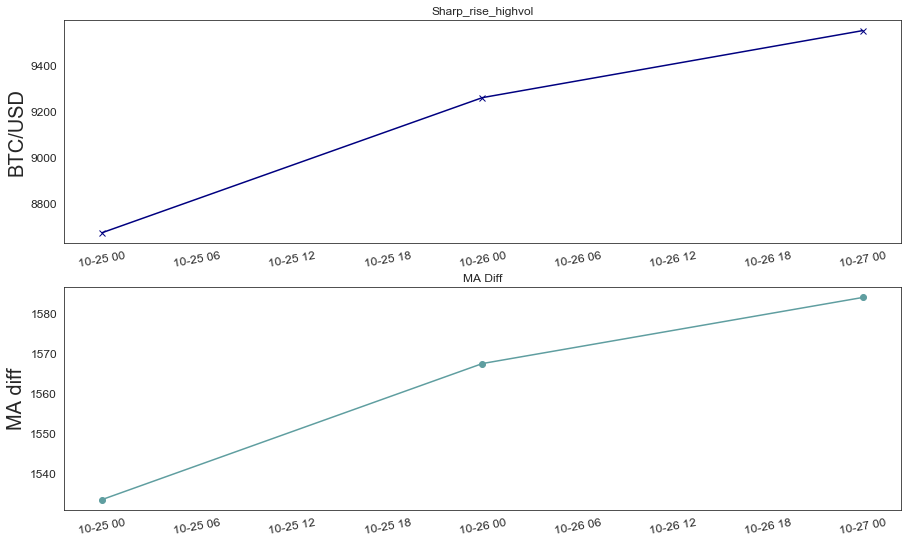

In [12]:
subplot_regime('Sharp_rise_highvol','2019-10-24','2019-10-27')

The return of BTC was 0.8066145474778148
Occured over 49 day period
The return of BTC was 0.8066145474778148
Occured over 49 day period


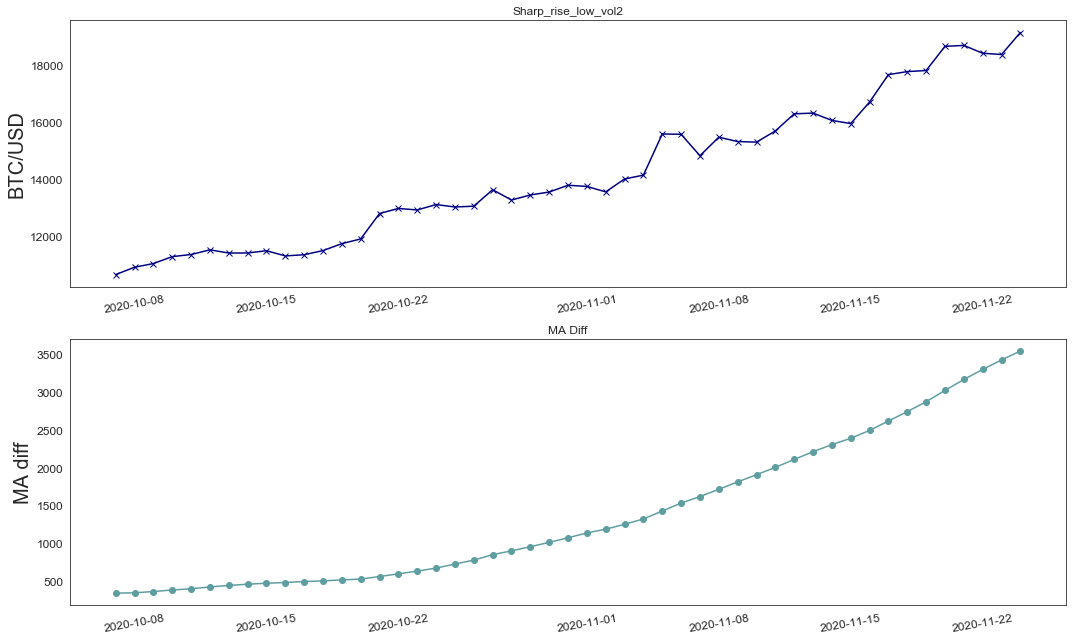

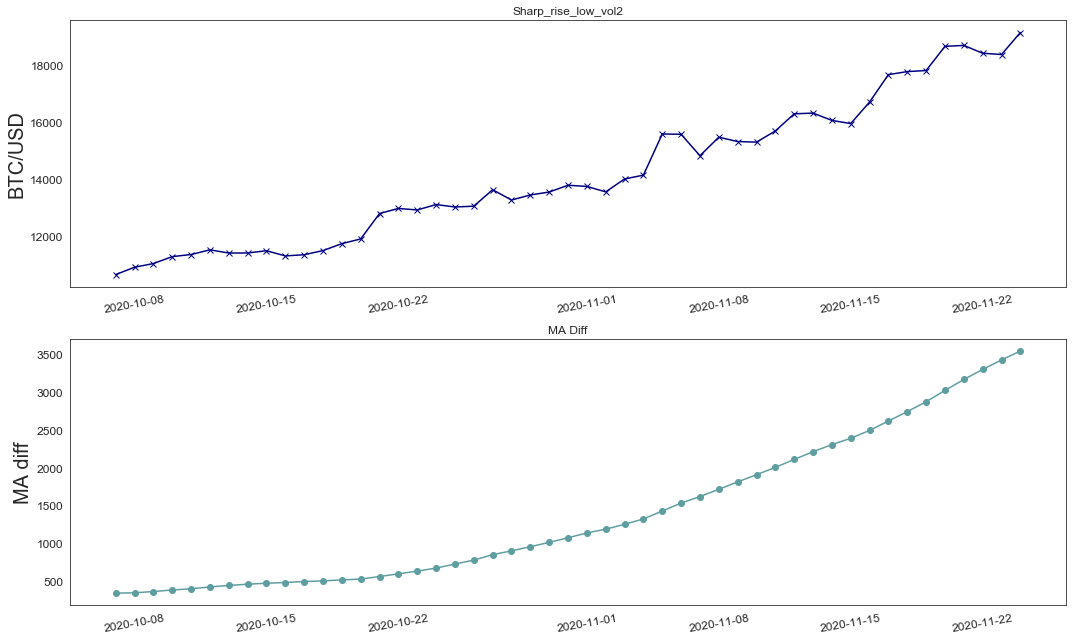

In [10]:
subplot_regime('Sharp_rise_low_vol2','2020-10-06','2020-11-24')

The return of BTC was 0.2585874019553551
Occured over 57 day period
The return of BTC was 0.2585874019553551
Occured over 57 day period


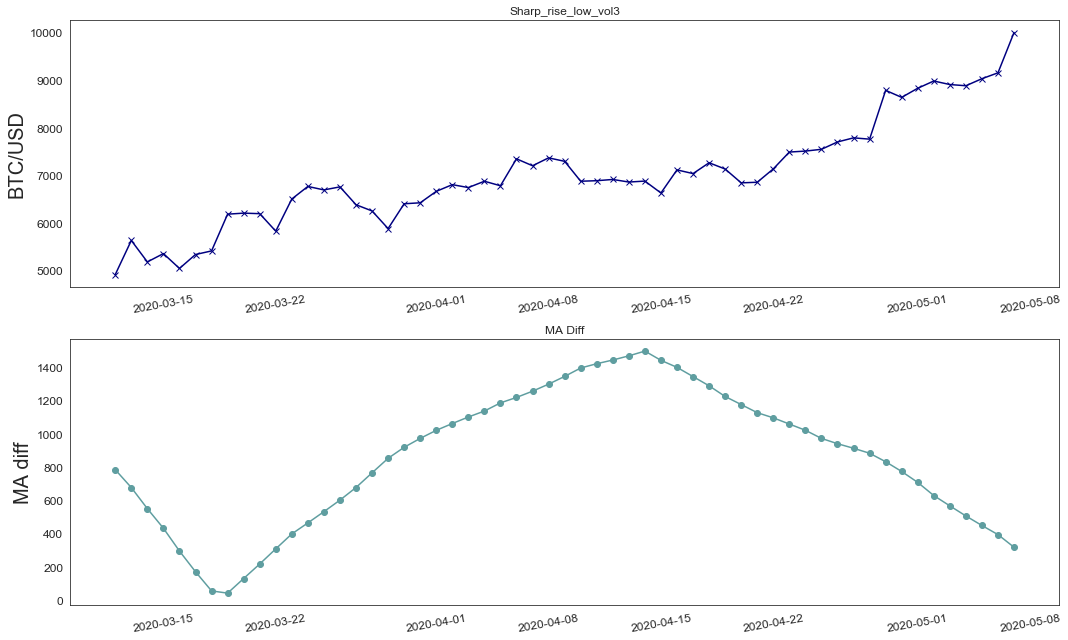

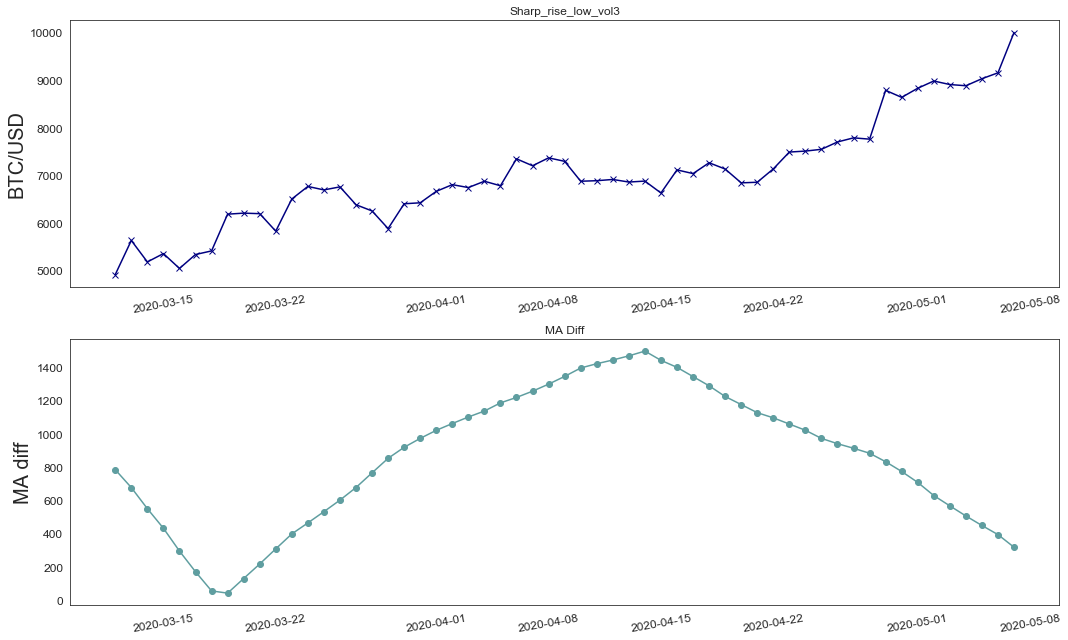

In [11]:
subplot_regime('Sharp_rise_low_vol3','2020-03-11','2020-05-07');

The return of BTC was -0.49031394438410825
Occured over 37 day period
The return of BTC was -0.49031394438410825
Occured over 37 day period


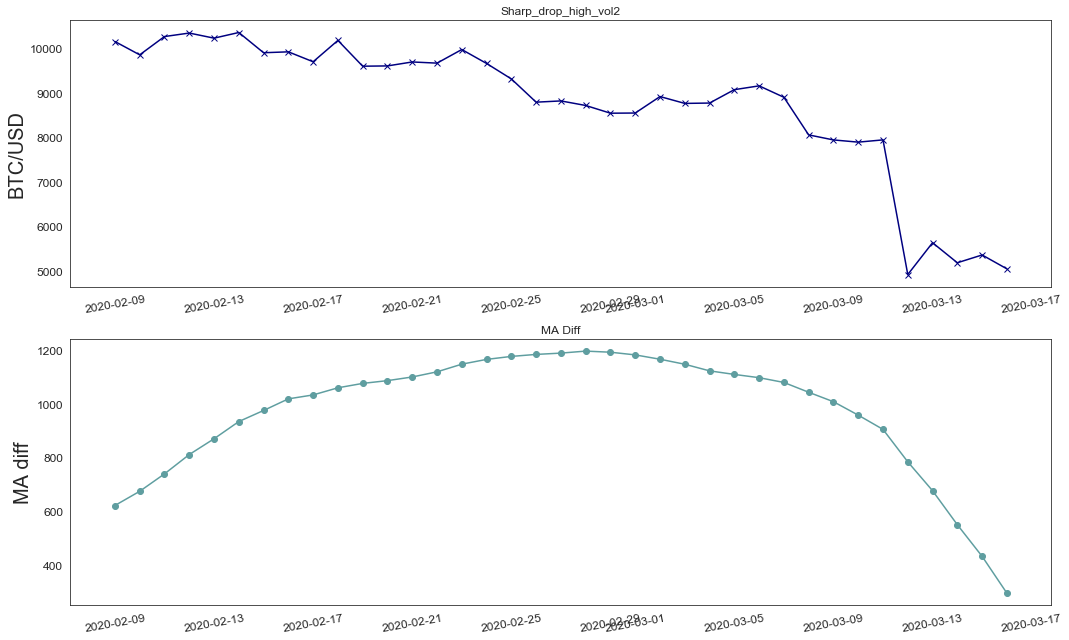

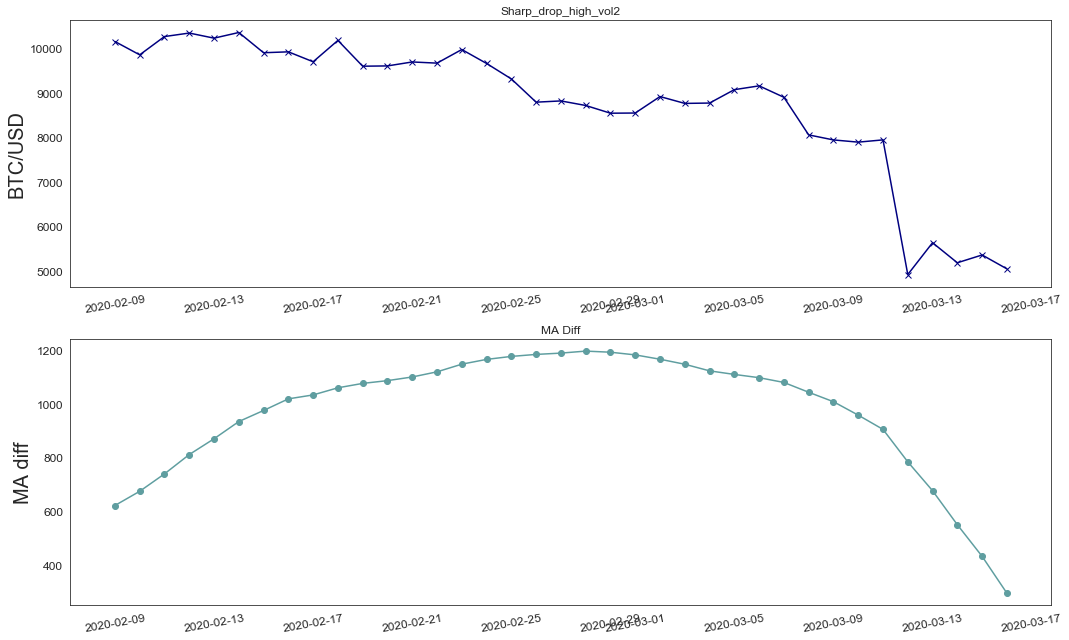

In [12]:
subplot_regime('Sharp_drop_high_vol2','2020-02-08','2020-03-16')

The return of BTC was 0.3777558419054856
Occured over 46 day period
The return of BTC was 0.3777558419054856
Occured over 46 day period


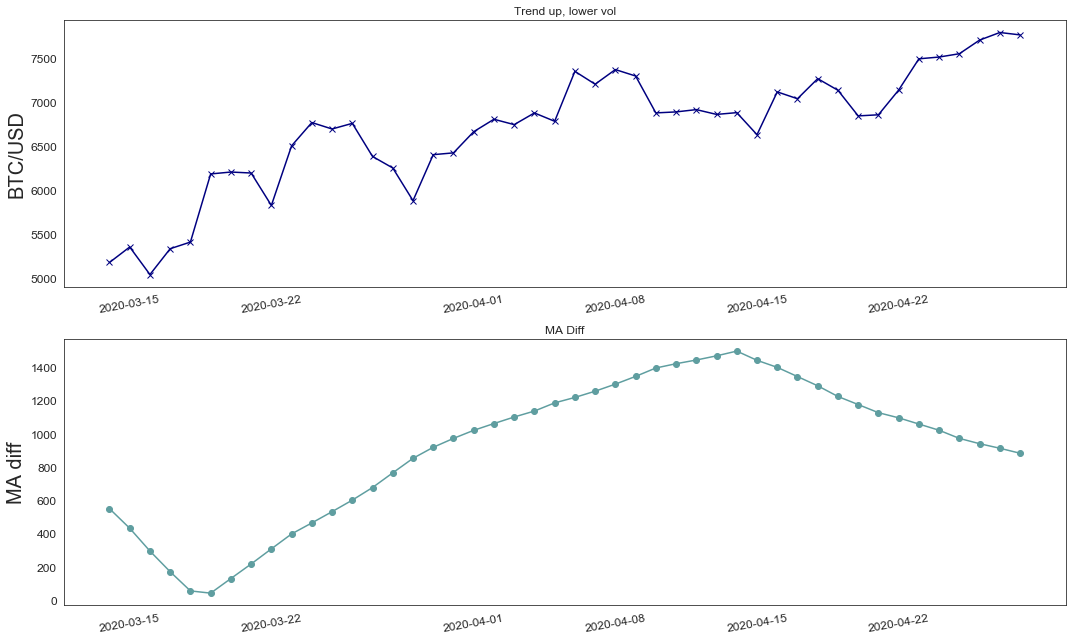

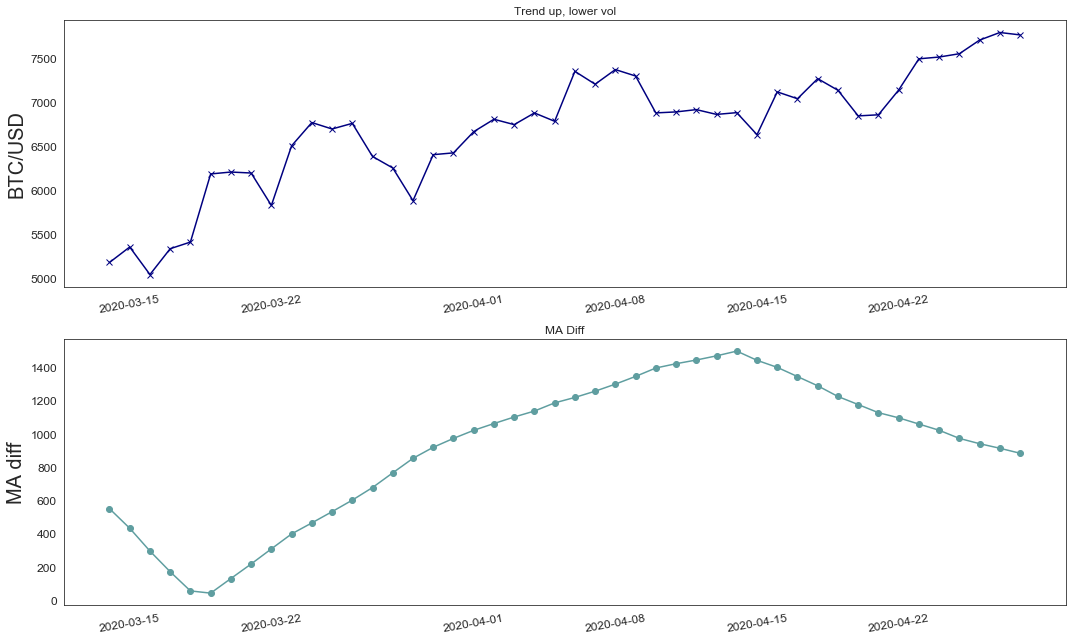

In [13]:
# #Trend up, lower vol
subplot_regime('Trend up, lower vol','2020-03-13','2020-04-28')

The return of BTC was -0.27438171423784896
Occured over 28 day period
The return of BTC was -0.27438171423784896
Occured over 28 day period


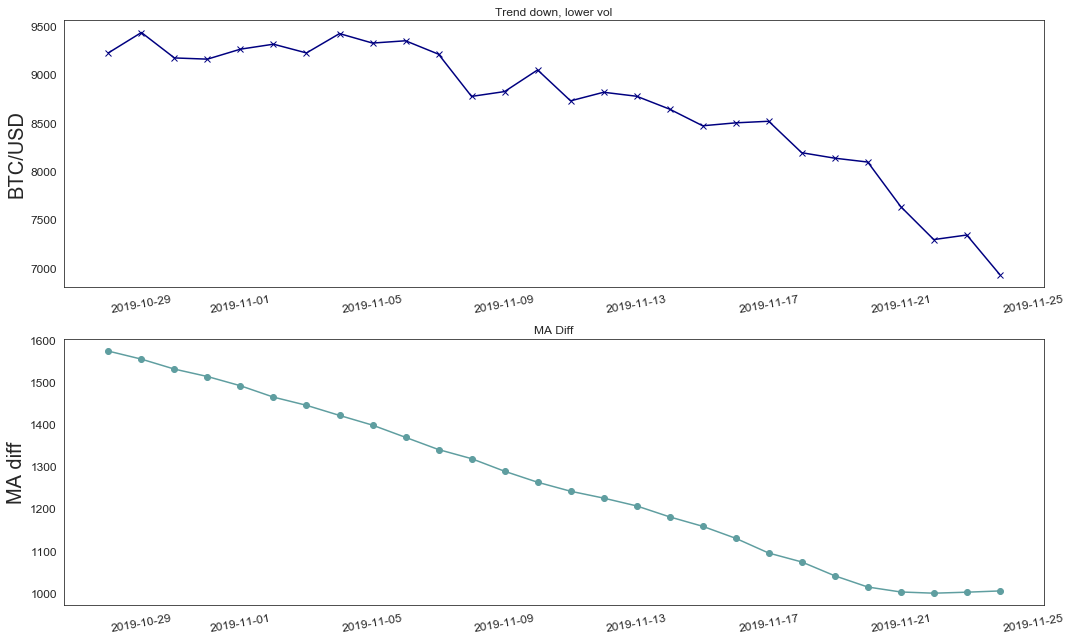

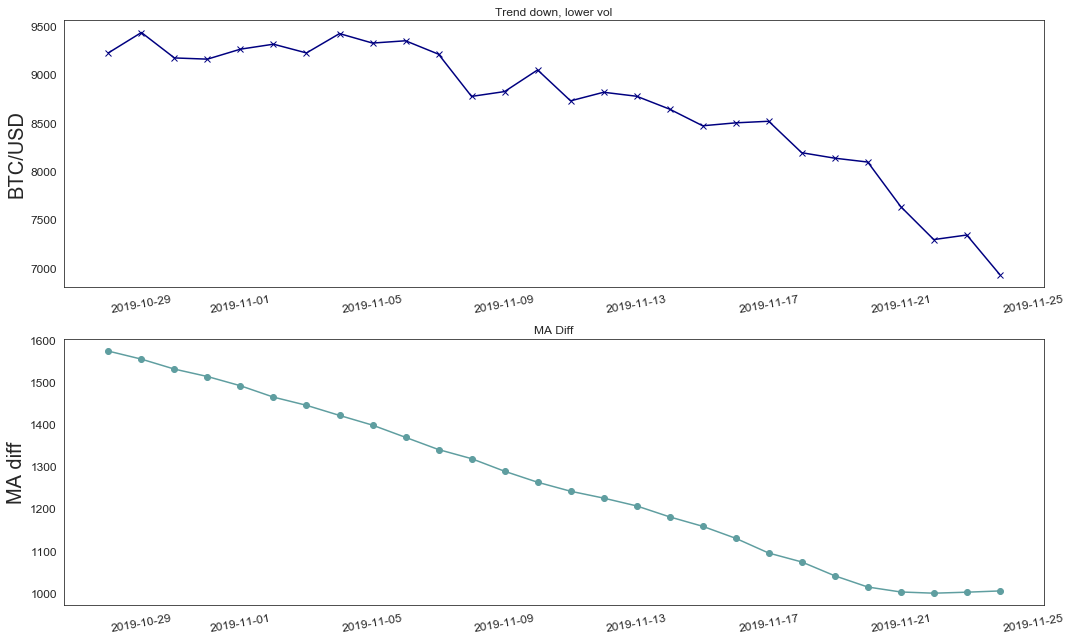

In [14]:
# Trend down, lower vol
subplot_regime('Trend down, lower vol','2019-10-27','2019-11-24')

The return of BTC was 0.14048221597138322
Occured over 26 day period
The return of BTC was 0.14048221597138322
Occured over 26 day period


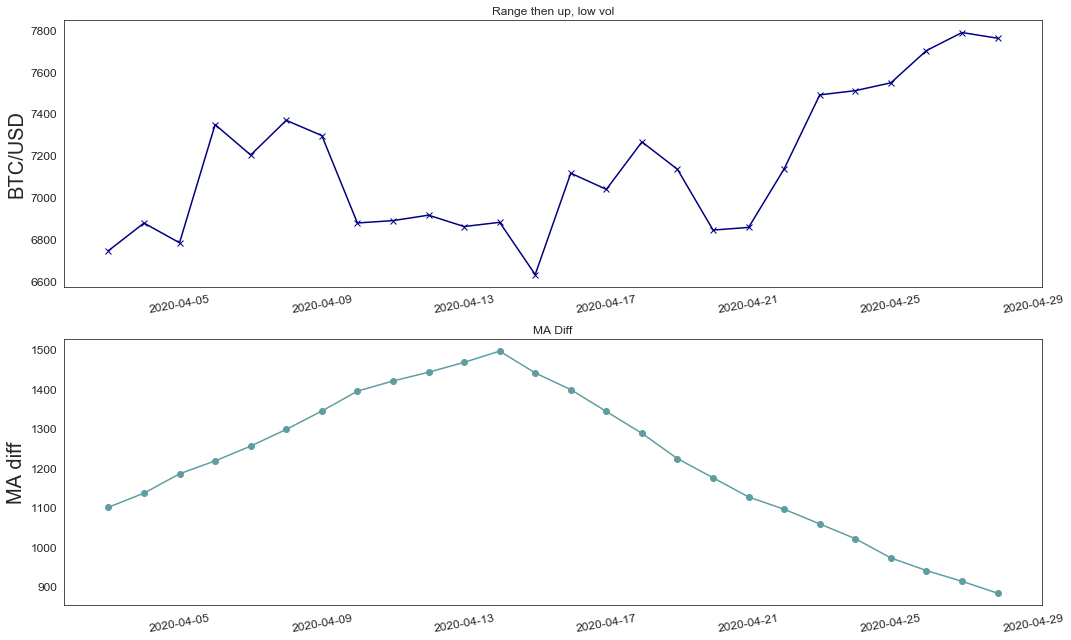

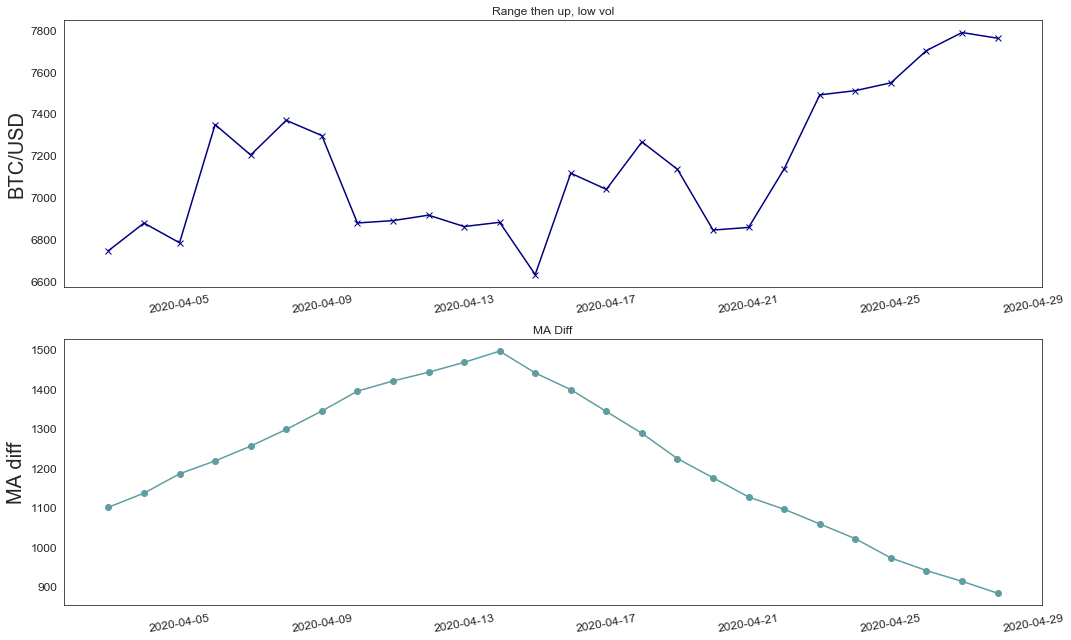

In [15]:
# #Range then up, low vol 
subplot_regime('Range then up, low vol','2020-04-02','2020-04-28')

The return of BTC was 0.006238070807558449
Occured over 20 day period
The return of BTC was 0.006238070807558449
Occured over 20 day period


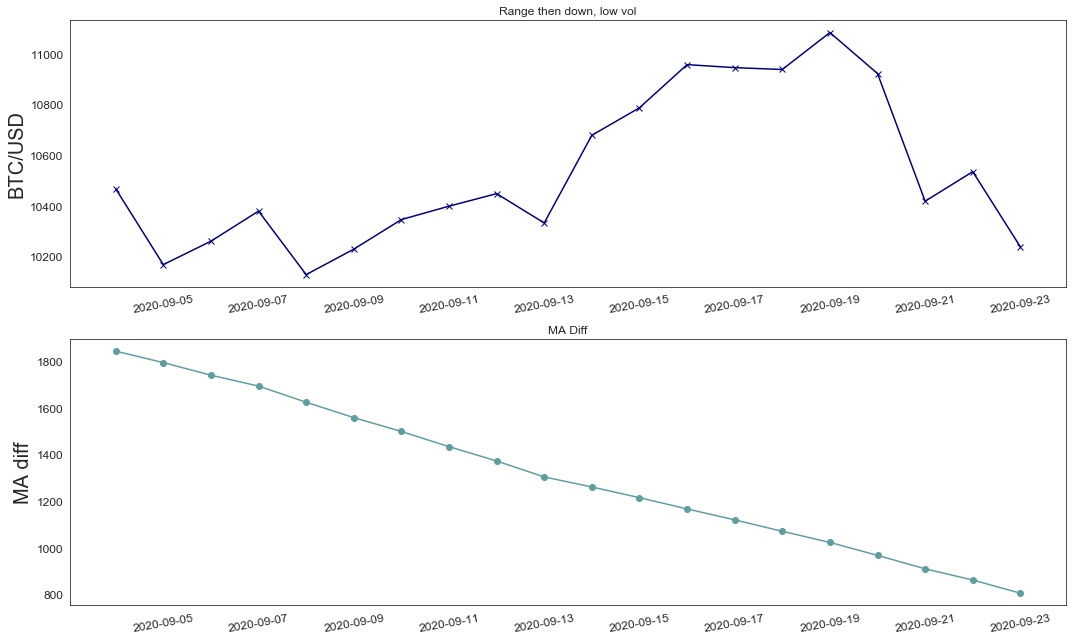

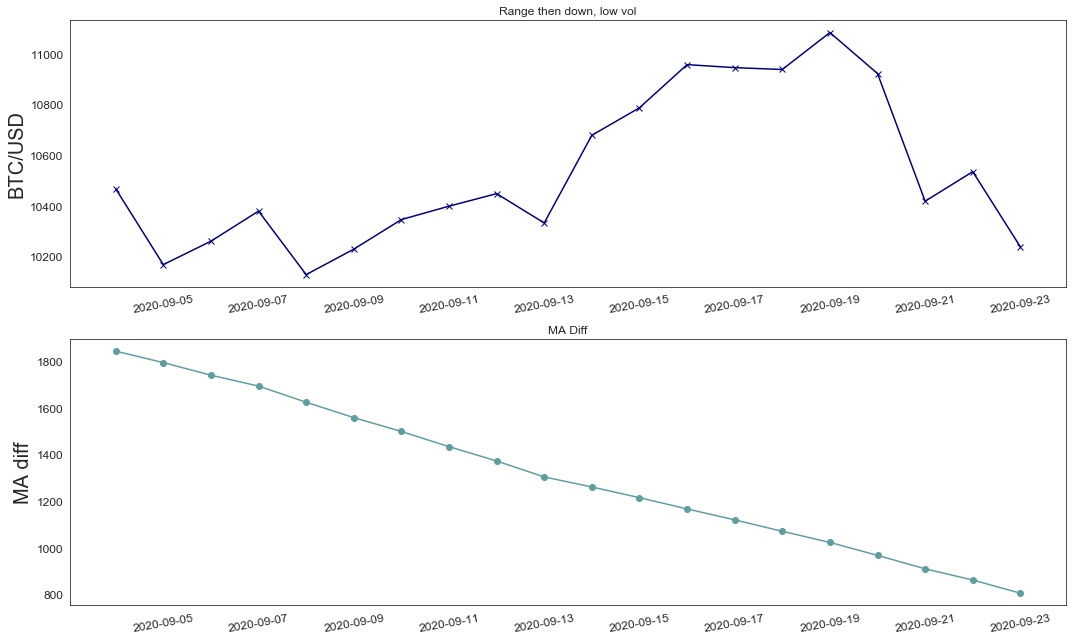

In [16]:
# #Range then down, low vol 
subplot_regime('Range then down, low vol','2020-09-03','2020-09-23')

The return of BTC was 0.030554925233515107
Occured over 25 day period
The return of BTC was 0.030554925233515107
Occured over 25 day period


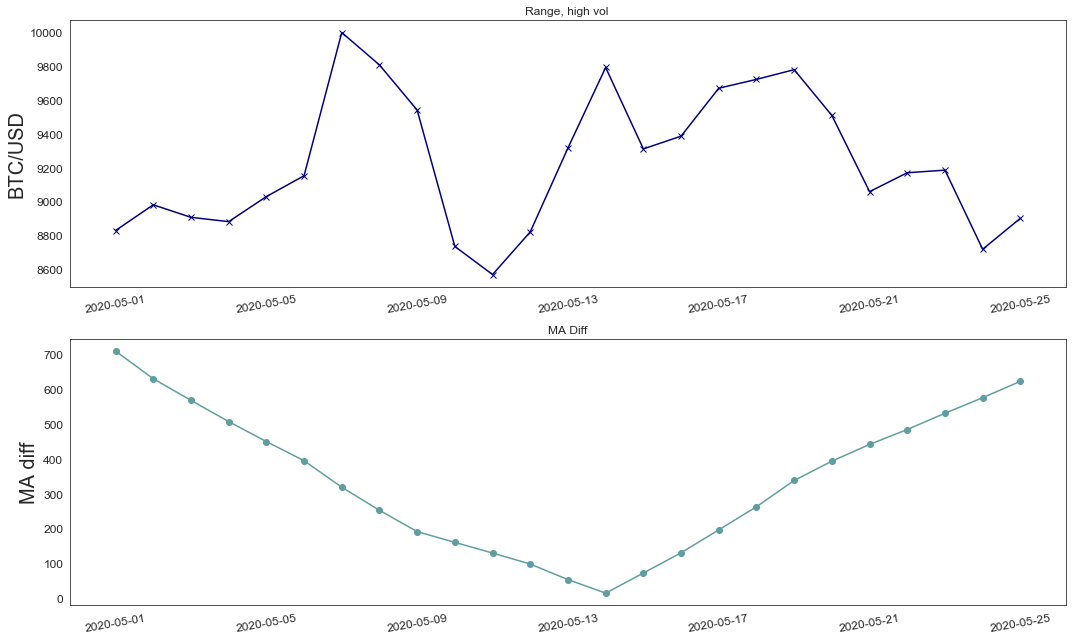

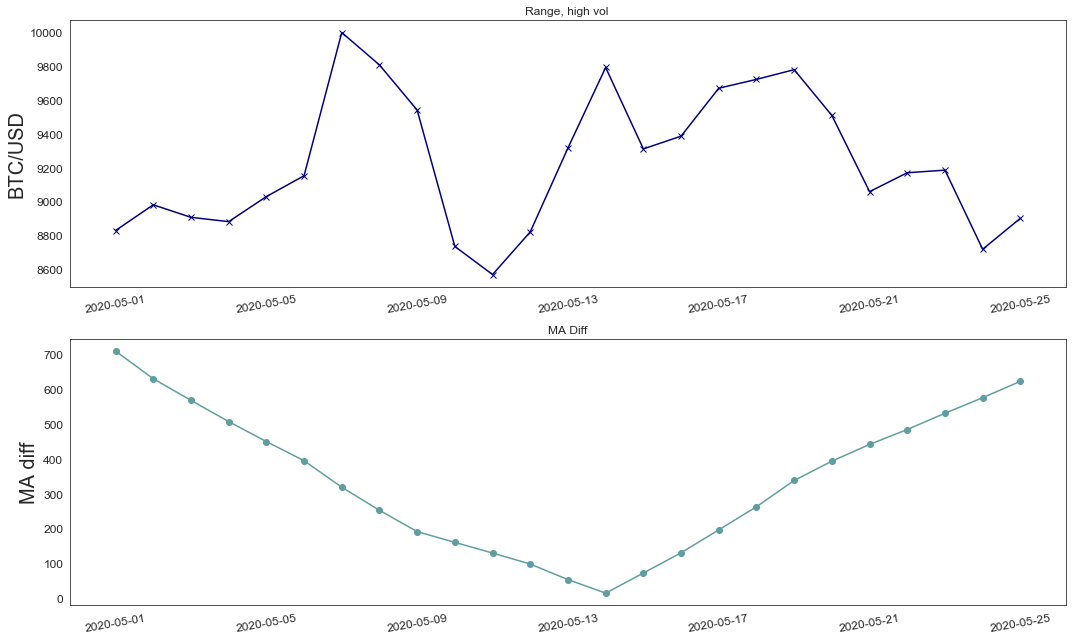

In [17]:
# Range, high vol 
subplot_regime('Range, high vol ','2020-04-30','2020-05-25')

The return of BTC was -0.025700941446883063
Occured over 13 day period
The return of BTC was -0.025700941446883063
Occured over 13 day period


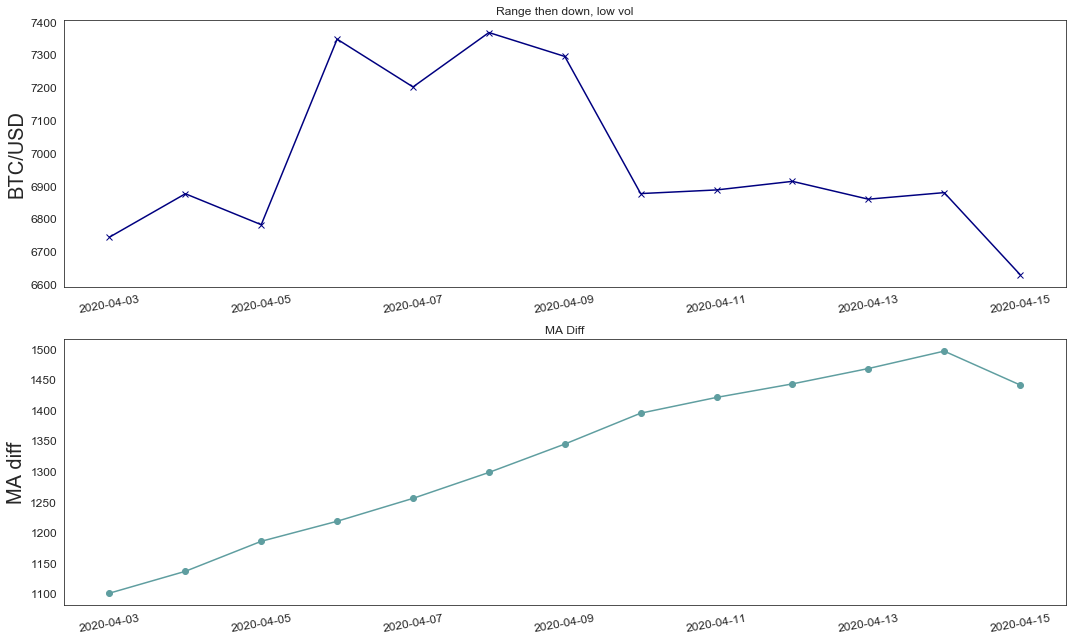

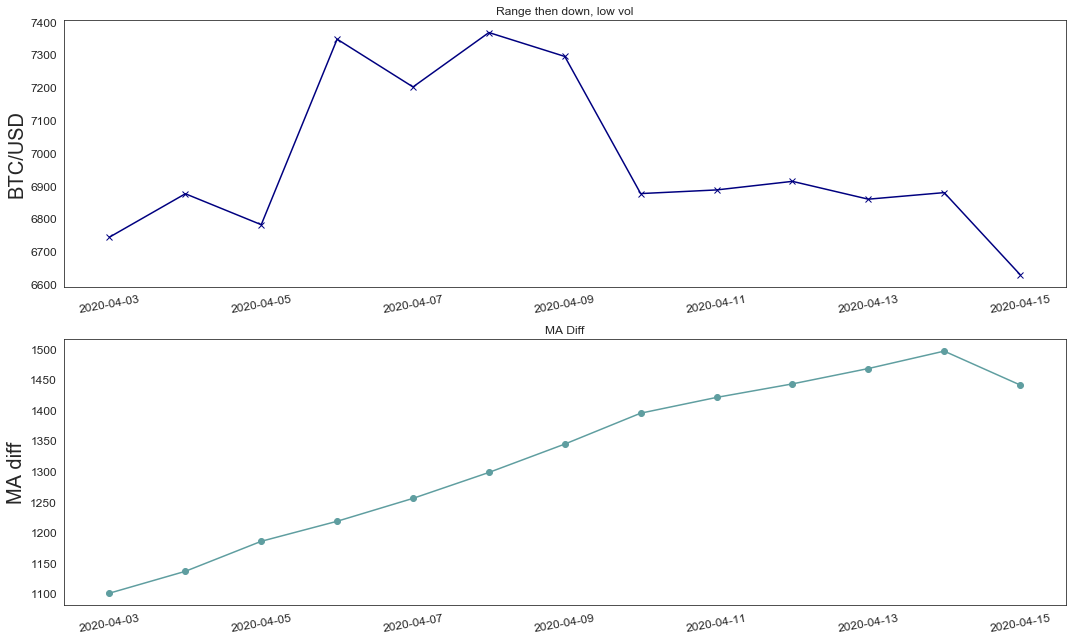

In [18]:
# #Range, low vol 
subplot_regime('Range then down, low vol','2020-04-02','2020-04-15')

The return of BTC was -0.04110179737245112
Occured over 32 day period
The return of BTC was -0.04110179737245112
Occured over 32 day period


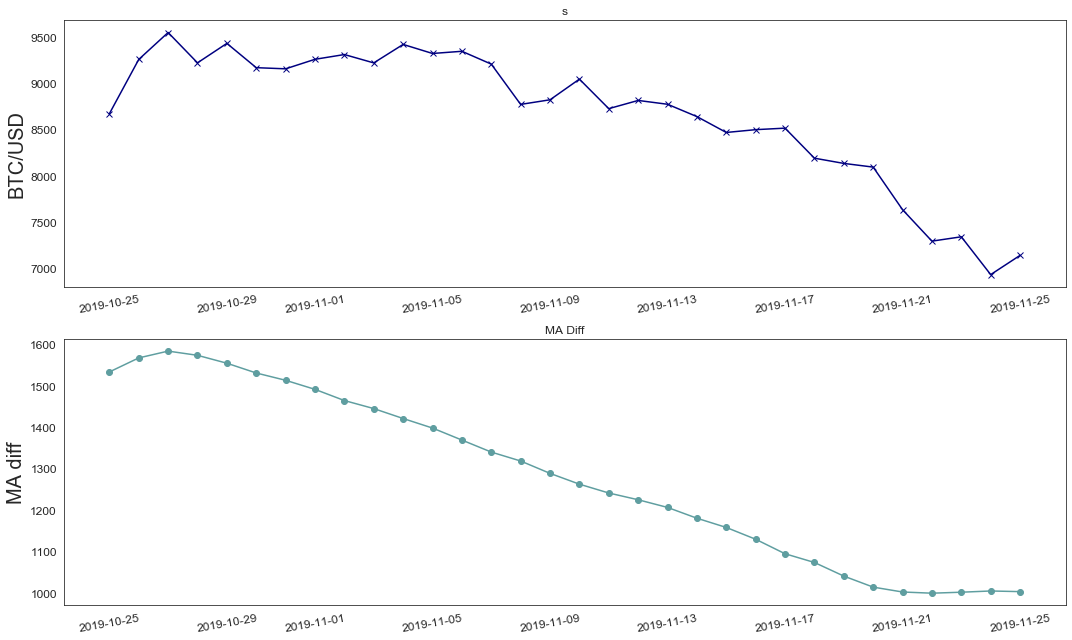

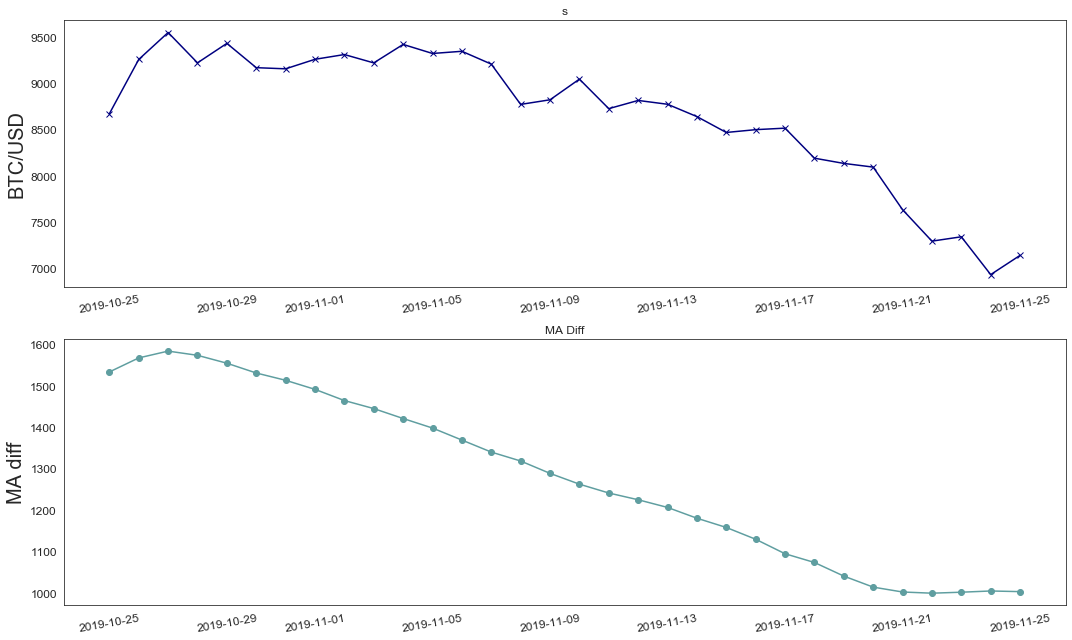

In [19]:
subplot_regime('s','10/24/2019', '11/25/2019')

The return of BTC was 0.33463657572310646
Occured over 39 day period
The return of BTC was 0.33463657572310646
Occured over 39 day period


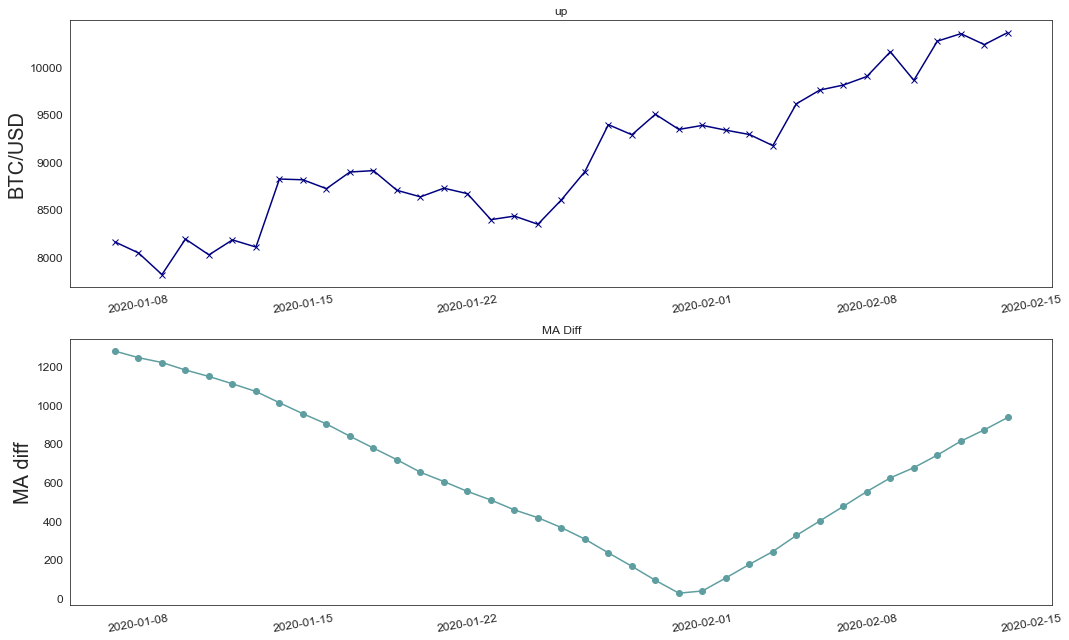

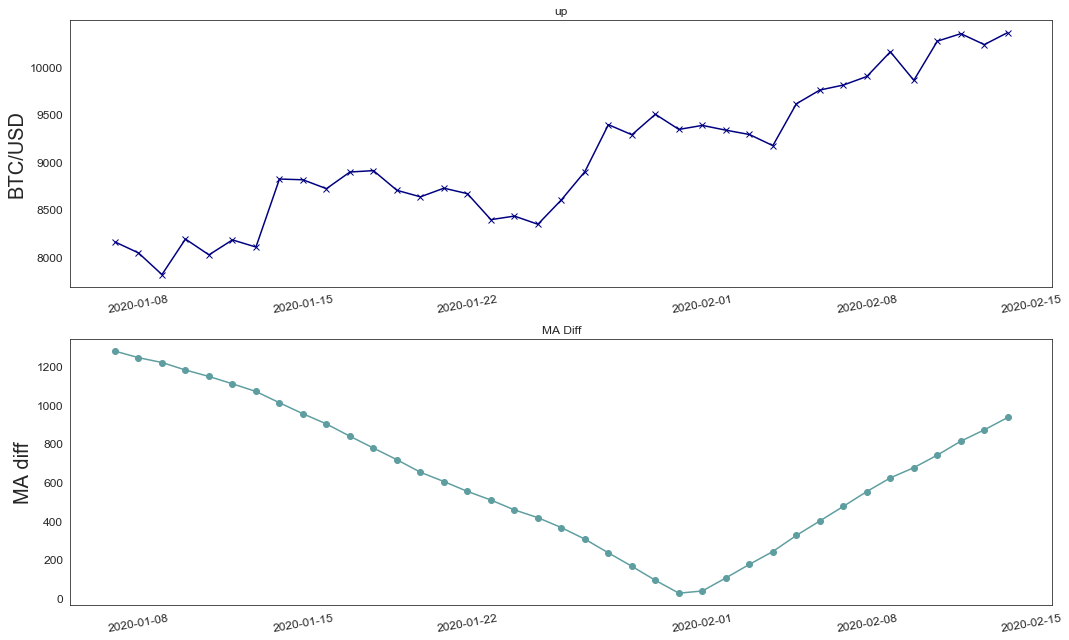

In [20]:
# #Range, low vol 
subplot_regime('up','2020-01-06','2020-02-14')

The return of BTC was -0.4495842991326373
Occured over 29 day period
The return of BTC was -0.4495842991326373
Occured over 29 day period


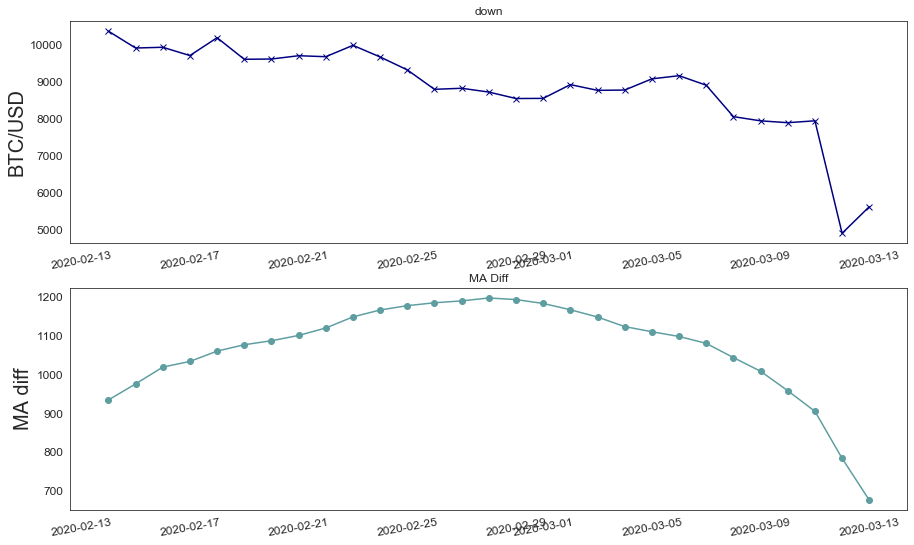

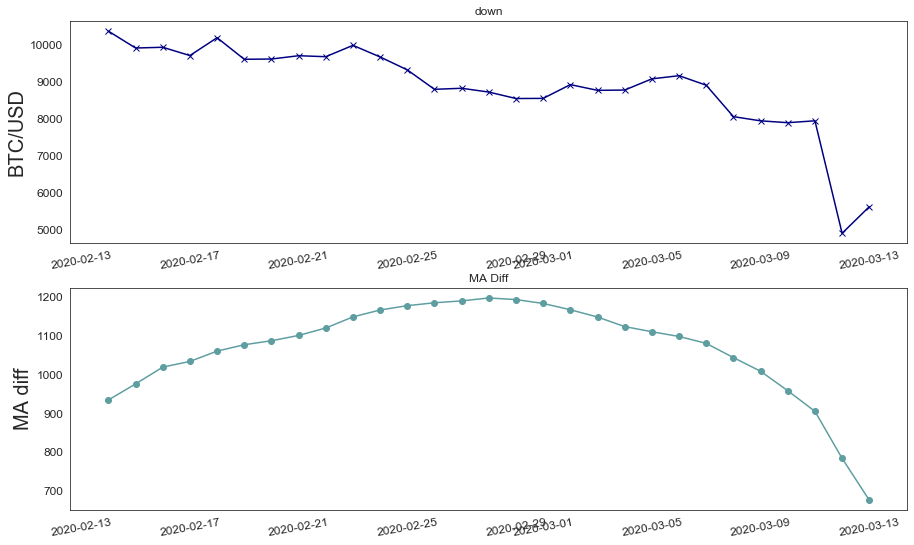

In [14]:
subplot_regime('down','2020-02-13','2020-03-13')